In [1]:
#%matplotlib notebook
%matplotlib inline
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, sys
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# BASELINE
# TFIDF
# SICK_VERBADJNOUN_lemma	0.611	0.091		# TFIDF
# SICK_ADJNOUN_lemma	0.558	0.111			# TFIDF
# SICK_VERBADJNOUN_orth	0.568	0.106		# TFIDF
# SICK_ADJNOUN_orth	0.542	0.119			# TFIDF

In [3]:
sick_test = pd.DataFrame.from_csv('SA_results/SICK_test_annotated.txt', sep='\t', header=0)
sick_test_overlap = pd.DataFrame.from_csv('SA_results/semeval_overlap_test.tsv', sep='\t', header=0)
print(sick_test['relatedness_score'].corr(sick_test_overlap['relatedness_score']))
sick_test = sick_test.reset_index()
#0.62701073200106172

0.627010732001


In [4]:
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 1000)

results_all = pd.DataFrame.from_csv('SA_results/scores_all_new.tsv', sep='\t', index_col=['crossfold_id','dev_file_index'])
results_all['dependency available'] = results_all.apply(lambda row: 'NO' if 'blanked' in row.train_data_path else 'YES', axis=1)
results_all['order aware'] = results_all.apply(lambda row: 'YES' if 'LSTM' in row.tree_embedder else 'NO', axis=1)
#results_all = results_all.set_index(['dependency available', 'order aware'])
results_all['pearson_tfidf'] = 0.618864
results_all['mse_tfidf'] = 0.082341
#results_all.set_index(['crossfold_id','dev_file_index'])
results_all[:10]

clipping      optimizer  lexicon_trainable  \
crossfold_id dev_file_index                                               
0            0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   

                             early_stop_queue  keep_prob  auto_restore  \
crossfold_id dev_file_index                                              
0            0                             25        0.8         False   
             0                             25        0.8         False   
             0                             25        0.8         False   
             0                             25        0.8         False   
             1                             25        0.8         False   
             1                             25        0.8         False   
             1                             25        0.8         False   
             1                             25        0.8         False   
             2                             25        0.8         False   
             2                             25        0.8         False   

                             batch_size  \
crossfold_id dev_file_index               
0            0                      100   
             0                      100   
             0                      100   
             0                      100   
             1                      100   
             1                      100   
             1                      100   
             1                      100   
             2                      100   
             2                      100   

                                                               run_description  \
crossfold_id dev_file_index                                                      
0            0               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             0               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             0               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             0               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             1               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             1               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             1               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             1               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             2               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   
             2               restoreFALSE_batchs100_clip5.0_singleFALSE_tes...   

                              epochs  \
crossfold_id dev_file_index            
0            0               1000000   
             0               1000000   
             0               1000000   
             0               1000000   
             1               1000000   
             1               1000000   
             1               1000000   
             1               1000000   
             2               1000000   
             2               1000000   

                                                               train_data_path  \
crossfold_id dev_file_index                                                      
0            0               /media/arne/WIN/ML/data/corpora/SICK/process_s...   
          

In [5]:
res = results_all[['dependency available', 'order aware', 'score_pearson', 'score_mse', 'pearson_tfidf', 'mse_tfidf']].set_index(['dependency available', 'order aware']).rename(columns={'score_pearson': 'pearson', 'score_mse':'mse'})
res

,,pearson,mse,pearson_tfidf,mse_tfidf
dependency available,order aware,,,,
NO,NO,0.839656,0.028558,0.618864,0.082341
YES,NO,0.842555,0.026927,0.618864,0.082341
NO,YES,0.837874,0.020711,0.618864,0.082341
YES,YES,0.839254,0.020170,0.618864,0.082341
NO,NO,0.835462,0.029643,0.618864,0.082341
YES,NO,0.838937,0.027700,0.618864,0.082341
NO,YES,0.833905,0.021339,0.618864,0.082341
YES,YES,0.839310,0.020403,0.618864,0.082341
NO,NO,0.839617,0.027691,0.618864,0.082341


In [6]:
# get subsets
#res.xs('NO', level='dependency available')
#res.xs('NO', level='order aware')
s = res.xs(('NO', 'NO'), level=['order aware', 'dependency available'])
#pd.Series(s['pearson'])

In [7]:
import subprocess
def print_images(images, path="SA_results/images"):
    for name in images:
        p = os.path.join(path, name)
        # save figure as svg
        images[name].savefig('%s.svg' % p)
        # convert for latex
        subprocess.call(['inkscape','-D','-z','--file=%s.svg' % p, '--export-pdf=%s.pdf' % p, '--export-latex'])
        print('finished %s' % p)

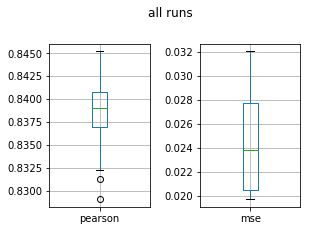

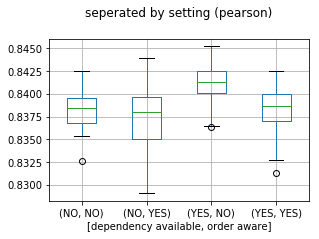

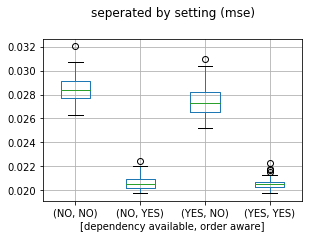

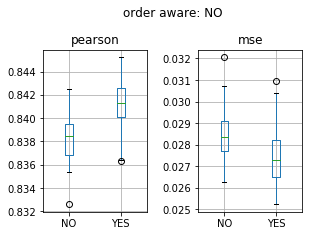

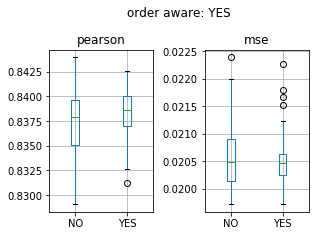

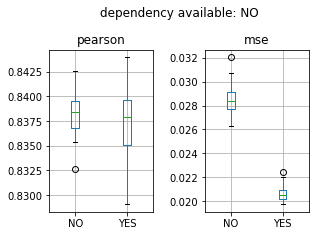

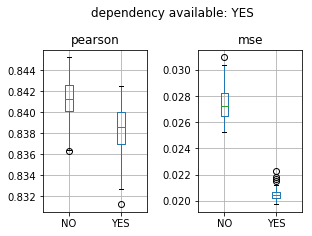

In [38]:
from matplotlib import rcParams

#rcParams['axes.titlepad'] = 20 
#rcParams['axes.titlepad'] = 20 
images = {}
bootstrap=10000

figsize = (4.5, 3)
fig_merged, axs = plt.subplots(1,2, figsize=figsize)
res.boxplot(column=['pearson'], figsize=(figsize[0] / 2, figsize[1]), ax=axs[0], bootstrap=bootstrap)
#axs[0].minorticks_on()
#axs[0].grid(which='minor', linestyle=':', linewidth='0.3', color='black')
res.boxplot(column=['mse'], figsize=(figsize[0] / 2, figsize[1]), ax=axs[1], bootstrap=bootstrap)
#axs[1].minorticks_on()
#axs[1].grid(which='minor', linestyle=':', linewidth='0.3', color='black')
fig_merged.suptitle('all runs', y=1.05)
plt.subplots_adjust(wspace=0.5)
images['fig_merged'] = fig_merged

y_title = 1.0
y_suptitle = 1.1

axs = res.boxplot(column=['pearson'], by=['dependency available', 'order aware'], figsize=figsize, bootstrap=bootstrap)
#axs.minorticks_on()
#axs.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.title('seperated by setting (pearson)', y=y_suptitle)
fig_sep_pearson = axs.get_figure()
fig_sep_pearson.suptitle('')
images['fig_sep_pearson'] = fig_sep_pearson

axs = res.boxplot(column=['mse'], by=['dependency available', 'order aware'], figsize=figsize, bootstrap=bootstrap)
#axs.minorticks_on()
#axs.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.title('seperated by setting (mse)', y=y_suptitle)
fig_sep_mse = axs.get_figure()
fig_sep_mse.suptitle('')
images['fig_sep_mse'] = fig_sep_mse

levels = ['order aware', 'dependency available']
other_level = {levels[0]: levels[1], levels[1]: levels[0]}

for level in levels:
    for v in ['NO', 'YES']:
        fig_sep, axs_sep = plt.subplots(1,2, figsize=figsize)
        res.xs(v, level=level).boxplot(column=['pearson'], by=[other_level[level]], ax=axs_sep[0], bootstrap=bootstrap)
        axs_sep[0].set_title('pearson', y=y_title)
        axs_sep[0].set_xlabel('')
        res.xs(v, level=level).boxplot(column=['mse'], by=[other_level[level]], ax=axs_sep[1], bootstrap=bootstrap)
        axs_sep[1].set_title('mse', y=y_title)
        axs_sep[1].set_xlabel('')
        fig_sep.suptitle('%s: %s' % (level, v), y=y_suptitle)
        #plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
        plt.subplots_adjust(wspace=0.5)
        images['fig_sep_%s%s' % (level.split()[0], v)] = fig_sep



In [9]:
print_images(images)

finished SA_results/images/fig_sep_orderNO
finished SA_results/images/fig_sep_mse
finished SA_results/images/fig_sep_dependencyYES
finished SA_results/images/fig_sep_pearson
finished SA_results/images/fig_merged
finished SA_results/images/fig_sep_dependencyNO
finished SA_results/images/fig_sep_orderYES


In [10]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from math import sqrt
import scipy.stats as st

def bootstrap_convidence(values, n_iterations=1000, alpha=0.95):
    #values = res.xs(('NO', 'NO'))['pearson']
    mean_b = np.mean(values)
    std_b = np.std(values)
    n_b_root = sqrt(len(values))
    # configure bootstrap
    #n_iterations = 10000
    n_size = int(len(values) * 0.10)
    # run bootstrap
    stats = list()
    for i in range(n_iterations):
        samples = resample(values, n_samples=n_size)
        t_i = (np.mean(samples) - mean_b) * n_b_root / np.std(samples)
        stats.append(t_i)
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    
    # confidence intervals
    #print(stats)
    #p_lower = ((1.0-alpha)/2.0) * 100
    p_lower = (alpha/2.) * 100
    #p = (alpha / 2.0) * 100
    lower = numpy.percentile(stats, p_lower)
    #lower = st.t._ppf(p_lower, n_iterations-1)
    #print('lower %.2f: %.3f' % (p_lower, lower))
    #p_upper = (alpha+((1.0-alpha)/2.0)) * 100
    p_upper = (1.-alpha/2.) * 100
    #p = (1.0 - alpha / 2.0) * 100
    upper = numpy.percentile(stats, p_upper)
    #upper = st.t._ppf(p_upper, n_iterations-1)
    #print('upper %.1f: %.3f' % (p_upper, upper))
    c_intv = [mean_b + lower * std_b / n_b_root, mean_b + upper * std_b / n_b_root]
    return c_intv

#def mean_confidence(values, alpha=0.95):
#    return st.t.interval(alpha, len(values)-1, loc=np.mean(values), scale=st.sem(values))

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h


alpha = 0.5
for measure in ['pearson', 'mse']:
    print('confidence intervalls for %s (order aware, dependency available):' % measure)
    values = res[measure]
    conf_simple = mean_confidence_interval(values, confidence=1-alpha)
    print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s naive' % ('ALL', 100 - alpha*100, conf_simple[1],conf_simple[2], conf_simple[2] - conf_simple[1], conf_simple[1] <= conf_simple[0] <= conf_simple[2]))
    c_boot = bootstrap_convidence(values, alpha=alpha)
    print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s' % ('ALL', 100 - alpha*100, c_boot[0],c_boot[1], c_boot[1] - c_boot[0], c_boot[0] <= conf_simple[0] <= c_boot[1]))
    for setting in [('NO', 'NO'), ('NO', 'YES'), ('YES', 'NO'), ('YES', 'YES')]:
        values = res.xs(setting)[measure]
        conf_simple = mean_confidence_interval(values, confidence=1-alpha)
        print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s naive' % (str(setting), 100 - alpha*100, conf_simple[1],conf_simple[2], conf_simple[2] - conf_simple[1], conf_simple[1] <= conf_simple[0] <= conf_simple[2]))
        c_boot = bootstrap_convidence(values=values, alpha=alpha)
        print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s' % (str(setting), 100 - alpha*100, c_boot[0],c_boot[1], c_boot[1] - c_boot[0], c_boot[0] <= conf_simple[0] <= c_boot[1]))
print('finished')  
#print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

confidence intervalls for pearson (order aware, dependency available):
ALL             50.0% confidence interval: 0.8387 and 0.8390 (0.0003) True naive
ALL             50.0% confidence interval: 0.8384 and 0.8393 (0.0009) True
('NO', 'NO')    50.0% confidence interval: 0.8380 and 0.8384 (0.0004) True naive


/home/arne/miniconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py:196: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


('NO', 'NO')    50.0% confidence interval: 0.8376 and 0.8389 (0.0013) True
('NO', 'YES')   50.0% confidence interval: 0.8372 and 0.8378 (0.0006) True naive
('NO', 'YES')   50.0% confidence interval: 0.8364 and 0.8388 (0.0024) True
('YES', 'NO')   50.0% confidence interval: 0.8411 and 0.8415 (0.0004) True naive
('YES', 'NO')   50.0% confidence interval: 0.8405 and 0.8421 (0.0016) True
('YES', 'YES')  50.0% confidence interval: 0.8380 and 0.8385 (0.0005) True naive
('YES', 'YES')  50.0% confidence interval: 0.8375 and 0.8395 (0.0020) True
confidence intervalls for mse (order aware, dependency available):
ALL             50.0% confidence interval: 0.0241 and 0.0244 (0.0004) True naive
ALL             50.0% confidence interval: 0.0237 and 0.0248 (0.0012) True
('NO', 'NO')    50.0% confidence interval: 0.0283 and 0.0285 (0.0002) True naive
('NO', 'NO')    50.0% confidence interval: 0.0279 and 0.0288 (0.0008) True
('NO', 'YES')   50.0% confidence interval: 0.0205 and 0.0207 (0.0001) True nai

In [11]:
ex_values = np.array([110, 112, 106, 90, 96, 118, 108, 114, 107, 90, 85, 84, 113, 105, 90, 104])
print(ex_values.mean())
s = ex_values.std(ddof=1)
print(s*s)
alpha = 0.05
high_p = 1. - (alpha / 2.)
low_p = alpha / 2.
print(low_p)
print(high_p)
low = np.percentile(ex_values, low_p * 100)
high = np.percentile(ex_values, high_p * 100)
print(low)
print(high)

print(mean_confidence_interval(ex_values))

102.0
123.733333333
0.025
0.975
84.375
116.5
(102.0, 96.072679350832317, 107.92732064916768)


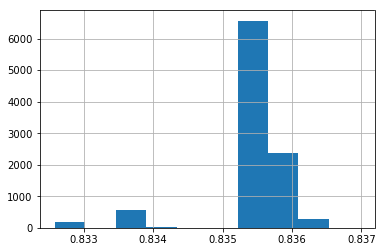

In [12]:
from sklearn.utils import resample
def bootstrap_5th_percentile(data, n_bootstraps):
    bootstraps = []
    for _ in xrange(n_bootstraps):
        # Sample with replacement from data
        samples = resample(data)
        # Then we take the fifth percentile!
        bootstraps.append(np.percentile(samples, len(data) * 0.1))
    return pd.Series(bootstraps)
values = res.xs(('NO', 'NO'))['pearson']
bootstraps = bootstrap_5th_percentile(values, 10000)
bootstraps.hist()

In [13]:
print('pearson       mean:  %f' % res[['pearson']].mean().values[0])
print('pearson        std:  %f' % res[['pearson']].std().values[0])
print('pearson_tfidf mean:  %f' % res[['pearson_tfidf']].mean().values[0])
print('mse           mean:  %f' % res[['mse']].mean().values[0])
print('mse            std:  %f' % res[['mse']].std().values[0])
print('mse_tfidf     mean:  %f' % res[['mse_tfidf']].mean().values[0])

res_grouped = {}
res_grouped[('dependency available', 'order aware')] = res.groupby(['dependency available', 'order aware'])
res_grouped['dependency available'] = res.groupby(['dependency available'])
res_grouped['order aware'] = res.groupby(['order aware'])
print(res_grouped[('dependency available', 'order aware')].mean())
print(res_grouped[('dependency available', 'order aware')].std())
print(res_grouped['dependency available'].std())
print(res_grouped['order aware'].std())


#res_grouped[('dependency available', 'order aware')][res_grouped[('dependency available', 'order aware')] == ('NO','NO')]

pearson       mean:  0.838813
pearson        std:  0.002867
pearson_tfidf mean:  0.618864
mse           mean:  0.024235
mse            std:  0.003824
mse_tfidf     mean:  0.082341
                                   pearson       mse  pearson_tfidf  mse_tfidf
dependency available order aware                                              
NO                   NO           0.838180  0.028394       0.618864   0.082341
                     YES          0.837504  0.020598       0.618864   0.082341
YES                  NO           0.841277  0.027425       0.618864   0.082341
                     YES          0.838292  0.020524       0.618864   0.082341
                                   pearson       mse  pearson_tfidf  mse_tfidf
dependency available order aware                                              
NO                   NO           0.001873  0.001189            0.0        0.0
                     YES          0.003102  0.000609            0.0        0.0
YES                  NO       

In [14]:
# gain
# setting [dependency available, order aware]	pearson	mse	diff pearson	diff mse	% pearson	% mse
# TFIDF	0.6189	0.0823	0.0000	0.0000		
# NO, NO	0.8382	0.0284	0.2193	-0.0539	100.00	100.00
# NO, YES	0.8375	0.0206	0.2186	-0.0617	99.69	114.45
# YES,NO	0.8413	0.0274	0.2224	-0.0549	101.41	101.80
# YES, YES	0.8383	0.0205	0.2194	-0.0618	100.05	114.59

In [15]:
#res = results_all[['dependency available', 'order aware', 'score_pearson', 'score_mse', 'pearson_tfidf', 'mse_tfidf']]
res_ = {}
res_['pearson'] = results_all[['dependency available', 'order aware','score_pearson']]
res_['mse'] = results_all[['dependency available', 'order aware','score_mse']]
# all settings seperated
pivot = {}
pivot['pearson'] = pd.pivot_table(res_['pearson'], values='score_pearson', index=['crossfold_id', 'dev_file_index'], columns=['dependency available','order aware'])
pivot['mse'] = pd.pivot_table(res_['mse'], values='score_mse', index=['crossfold_id', 'dev_file_index'], columns=['dependency available','order aware'])
# spereated by order aware
pivot_merged = {'pearson':{}, 'mse':{}}
pivot_merged['pearson']['order aware'] = pd.pivot_table(res_['pearson'], values='score_pearson', index=['crossfold_id', 'dev_file_index', 'dependency available'], columns=['order aware'])
pivot_merged['mse']['order aware'] = pd.pivot_table(res_['mse'], values='score_mse', index=['crossfold_id', 'dev_file_index', 'dependency available'], columns=['order aware'])
# spereated by dependency available
#pivot_dep = {}
pivot_merged['pearson']['dependency available'] = pd.pivot_table(res_['pearson'], values='score_pearson', index=['crossfold_id', 'dev_file_index', 'order aware'], columns=['dependency available'])
pivot_merged['mse']['dependency available'] = pd.pivot_table(res_['mse'], values='score_mse', index=['crossfold_id', 'dev_file_index', 'order aware'], columns=['dependency available'])
#pivot['mse'] #['NO', 'NO'] - pivot_mse['NO', 'YES']
#pivot_['pearson']['dependency available']['NO']
pivot['mse']

dependency available               NO                 YES          
order aware                        NO       YES        NO       YES
crossfold_id dev_file_index                                        
0            0               0.028558  0.020711  0.026927  0.020170
             1               0.029643  0.021339  0.027700  0.020403
             2               0.027691  0.019871  0.030219  0.020779
             3               0.027694  0.020246  0.027740  0.021798
             4               0.027870  0.020566  0.026084  0.020635
1            0               0.027841  0.020444  0.026537  0.020806
             1               0.030558  0.021352  0.025562  0.020453
             2               0.027728  0.021157  0.028392  0.020184
             3               0.032059  0.019976  0.026071  0.020590
             4               0.027171  0.022389  0.025583  0.020395
2            0               0.029905  0.020919  0.025227  0.020402
             1               0.030706  0.020563  0.027085  0.020743
             2               0.028803  0.020177  0.028817  0.019718
             3               0.029151  0.020667  0.027908  0.020877
             4               0.026822  0.020654  0.026494  0.020628
3            0               0.027114  0.020611  0.026148  0.020563
             1               0.027314  0.020107  0.027315  0.021663
             2               0.028432  0.020826  0.030381  0.020281
             3               0.026740  0.020004  0.026888  0.019973
             4               0.027896  0.020161  0.025689  0.020125
4            0               0.029200  0.019902  0.027849  0.019984
             1               0.029206  0.019867  0.028119  0.020512
             2               0.028910  0.020431  0.026586  0.020593
             3               0.027725  0.020089  0.028886  0.020788
             4               0.030078  0.021078  0.026707  0.020187
5            0               0.028711  0.020194  0.028231  0.020228
             1               0.029396  0.020592  0.027869  0.020463
             2               0.028836  0.019836  0.027154  0.020203
             3               0.028152  0.020779  0.029675  0.020352
             4               0.027751  0.021251  0.025978  0.020727
6            0               0.028853  0.021880  0.030962  0.021515
             1               0.028504  0.021178  0.027562  0.020474
             2               0.027594  0.020140  0.027074  0.020611
             3               0.027891  0.020732  0.028686  0.020813
             4               0.026875  0.020120  0.026418  0.019966
7            0               0.028541  0.019849  0.026741  0.022256
             1               0.027169  0.021700  0.028914  0.020163
             2               0.028020  0.020205  0.026541  0.020541
             3               0.028515  0.020113  0.029294  0.020348
             4               0.027299  0.021987  0.027440  0.020283
8            0               0.029004  0.020966  0.028359  0.020468
             1               0.026843  0.020387  0.027447  0.020312
             2               0.027693  0.020482  0.026044  0.021220
             3               0.029804  0.020130  0.026740  0.020330
             4               0.026768  0.020459  0.026421  0.020324
9            0               0.026270  0.021485  0.027220  0.020527
             1               0.029453  0.020418  0.028653  0.019740
             2               0.028301  0.019710  0.028020  0.020561
             3               0.030108  0.020723  0.025321  0.020565
             4               0.028554  0.020486  0.027596  0.019951

In [16]:
temp = res_['mse'].reset_index().set_index(['dependency available', 'order aware'])
## get best dev_file_index (min score_mse) 
#temp['dev_file_index'].groupby('dev_file_index').min()

## get best score_mse per setting 
## ATTENTION: look up score_mse in full list to get crossfold_id! the crossfold_id displayed here is not the best one
temp[temp['dev_file_index'] == 2].groupby(['dependency available', 'order aware']).min()

crossfold_id  dev_file_index  score_mse
dependency available order aware                                         
NO                   NO                      0               2   0.027594
                     YES                     0               2   0.019710
YES                  NO                      0               2   0.026044
                     YES                     0               2   0.019718

In [17]:
from scipy import stats
settings = [('NO', 'NO'), ('NO', 'YES'), ('YES', 'NO'), ('YES', 'YES')]
for i, s1 in enumerate(settings):
    for s2 in settings[i+1:]:
        for measure in ['mse', 'pearson']:
            #%-15s %.1f
            #if s1 != s2:
            dif = pivot[measure][s2[0], s2[1]].mean() - pivot[measure][s1[0], s1[1]].mean()
            ttest = stats.ttest_ind(pivot[measure][s1[0], s1[1]], pivot[measure][s2[0], s2[1]], equal_var=False)
            print('%-14s vs %-14s %-10s: %10.4f   %.4f  %8.4f' % (str(s1), str(s2), measure, ttest[0], ttest[1], dif))

print()
measure = 'mse'
setting = 'dependency available'
dif = pivot_merged[measure][setting]['YES'].mean() - pivot_merged[measure][setting]['NO'].mean()
ttest = stats.ttest_ind(pivot_merged[measure][setting]['NO'], pivot_merged[measure][setting]['YES'], equal_var=False)
print('(merged) %-20s    %-10s  %10.4f   %.4f  %8.4f' % (setting, measure, ttest[0], ttest[1], dif))
merged = 'order aware'
dif = pivot_merged[measure][setting]['YES'].mean() - pivot_merged[measure][setting]['NO'].mean()
ttest = stats.ttest_ind(pivot_merged[measure][setting]['NO'], pivot_merged[measure][setting]['YES'], equal_var=False)
print('(merged) %-20s    %-10s  %10.4f   %.4f  %8.4f' % (setting, measure, ttest[0], ttest[1], dif))


# interesting results:
#('NO', 'NO')   vs ('NO', 'YES')  pearson   :     1.3194   0.1908
#('NO', 'NO')   vs ('YES', 'YES') pearson   :    -0.2459   0.8064
#('NO', 'YES')  vs ('NO', 'NO')   pearson   :    -1.3194   0.1908
#('NO', 'YES')  vs ('YES', 'YES') mse       :     0.6738   0.5021
#('NO', 'YES')  vs ('YES', 'YES') pearson   :    -1.3679   0.1745
#('YES', 'YES') vs ('NO', 'NO')   pearson   :     0.2459   0.8064
#('YES', 'YES') vs ('NO', 'YES')  mse       :    -0.6738   0.5021
#('YES', 'YES') vs ('NO', 'YES')  pearson   :     1.3679   0.1745

('NO', 'NO')   vs ('NO', 'YES')  mse       :    41.2657   0.0000   -0.0078
('NO', 'NO')   vs ('NO', 'YES')  pearson   :     1.3194   0.1908   -0.0007
('NO', 'NO')   vs ('YES', 'NO')  mse       :     3.8365   0.0002   -0.0010
('NO', 'NO')   vs ('YES', 'NO')  pearson   :    -7.6814   0.0000    0.0031
('NO', 'NO')   vs ('YES', 'YES') mse       :    43.3097   0.0000   -0.0079
('NO', 'NO')   vs ('YES', 'YES') pearson   :    -0.2459   0.8064    0.0001
('NO', 'YES')  vs ('YES', 'NO')  mse       :   -32.9444   0.0000    0.0068
('NO', 'YES')  vs ('YES', 'NO')  pearson   :    -7.0693   0.0000    0.0038
('NO', 'YES')  vs ('YES', 'YES') mse       :     0.6738   0.5021   -0.0001
('NO', 'YES')  vs ('YES', 'YES') pearson   :    -1.3679   0.1745    0.0008
('YES', 'NO')  vs ('YES', 'YES') mse       :    34.3888   0.0000   -0.0069
('YES', 'NO')  vs ('YES', 'YES') pearson   :     6.1891   0.0000   -0.0030
()
(merged) dependency available    mse             0.9645   0.3360   -0.0005
(merged) dependency av

In [18]:
#res_mse.hist(by='dependency available')
#plt.show
#res_mse.hist(by='order aware')
#plt.show
#res_pearson.hist(by='dependency available')
#plt.show
#res_pearson.hist(by='order aware')
#plt.show
#res_mse.hist()

In [19]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(pivot_merged['mse']['order aware'], alpha=0.7, figsize=(10, 10), diagonal='kde')

In [20]:
#scatter_matrix(pivot_pearson, alpha=0.7, figsize=(10, 10), diagonal='kde')

In [21]:
#'dependency available', 'order aware'
import os
paths = {}
settings = [('NO', 'NO'), ('NO', 'YES'), ('YES', 'NO'), ('YES', 'YES')]
settings = [str(s) for s in settings]
paths[settings[0]] = '/home/arne/ML_local/tf/supervised/log/SA/SICK_RUNS/BEST/AVG_2levels_blanked/6'
paths[settings[1]] = '/home/arne/ML_local/tf/supervised/log/SA/SICK_RUNS/BEST/LSTM_2levels_blanked/9'
paths[settings[2]] = '/home/arne/ML_local/tf/supervised/log/SA/SICK_RUNS/BEST/AVG_2levels/8'
paths[settings[3]] = '/home/arne/ML_local/tf/supervised/log/SA/SICK_RUNS/BEST/LSTM_2levels/2'
sims_predicted = {}
sims_gold_ = {}
errors_ = {}
sims_all = {}
for setting in settings:
    sims_predicted[setting] = np.load(os.path.join(paths[setting], 'sims.np'))
    sims_all[setting] = sims_predicted[setting]
    sims_gold_[setting] = np.load(os.path.join(paths[setting], 'sims_gold.np'))
    errors_[setting] =sims_predicted[setting]-sims_gold_[setting]
sims_gold = sims_gold_[settings[0]]
sims_predicted['sims_gold'] = sims_gold
sims_predicted = pd.DataFrame(sims_predicted)
sims_predicted

,"('NO', 'NO')","('NO', 'YES')","('YES', 'NO')","('YES', 'YES')",sims_gold
0,0.370564,0.414709,0.355933,0.419790,0.57500
1,0.725447,0.738850,0.731556,0.649033,0.67500
2,0.598656,0.462848,0.545540,0.433692,0.50000
3,0.960327,0.987081,0.964924,0.966371,0.97500
4,0.900868,0.810926,0.909717,0.865924,0.66625
5,0.671661,0.545044,0.627098,0.668202,0.57500
6,0.509854,0.602739,0.480061,0.483052,0.42500
7,0.659223,0.576433,0.617572,0.562165,0.47500
8,0.548275,0.475228,0.552428,0.523543,0.32500
9,0.983425,0.964340,0.983264,0.962290,0.97500


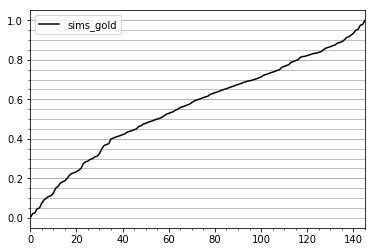

In [22]:
sims_gold_merged = sims_predicted.sort_values('sims_gold').groupby('sims_gold').mean().reset_index()[['sims_gold']]
plot_temp = sims_gold_merged.plot(color='k')
#plot_temp.get_yaxis().set_visible(True)
plot_temp.grid('on', which='major', axis='y' )
plot_temp.grid('on', which='minor', axis='y', linestyle='-')
#plot_temp.tick_params(axis='x',which='minor',bottom='off')
#plot_temp.tick_params(axis='y',which='minor',bottom='off')
plot_temp.minorticks_on()

/home/arne/miniconda2/lib/python2.7/site-packages/pandas/core/frame.py:5847: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


finished SA_results/images/fig_predictions_bp


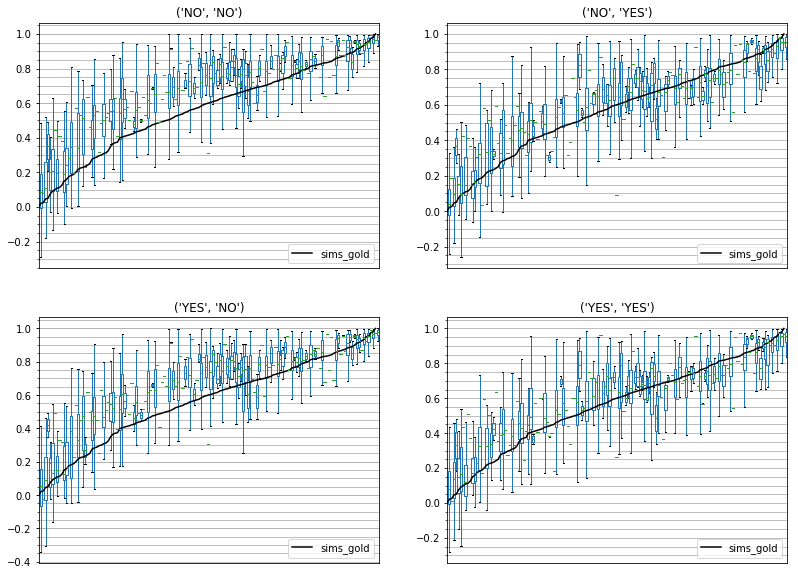

In [23]:
figsize = (13, 10)
fig_predictions_bp, axs = plt.subplots(2,2, figsize=figsize)

boxplot_axes = sims_predicted.sort_values('sims_gold').boxplot(by='sims_gold', figsize=figsize, showfliers=False, widths=1., ax=axs)
fig_predictions_bp.suptitle('')

for bp in boxplot_axes:
    gold_plot = sims_gold_merged.plot(use_index=False, ax=bp, color='k')
    gold_plot.legend(loc="lower right")
    bp.get_xaxis().set_visible(False)
    bp.grid('on', which='major', axis='y' )
    bp.grid('on', which='minor', axis='y' )
    bp.minorticks_on()

print_images({'fig_predictions_bp':fig_predictions_bp})

In [24]:
#sims_predicted.index.names = ['index']
#sims_predicted = sims_predicted.reset_index()
sims_predicted_grouped = sims_predicted.groupby("sims_gold").agg([min, max, np.mean]).reset_index()
sims_predicted['index'] = range(len(sims_predicted))
sims_predicted_grouped['indices'] = sims_predicted.groupby("sims_gold")["index"].apply(list).reset_index()['index']
sims_predicted = sims_predicted.drop(['index'], axis=1)

def max_dif(_min, _max, _gold):
    if abs(_min - _gold) > abs(_max - _gold):
        return _min
    else:
        return _max
    

#for s in settings:
    #sims_predicted_grouped[s, 'max_dif'] = sims_predicted_grouped.apply(lambda row: row[s, 'min'] if row[s, 'min'] < row[s, 'mean'] else row[s, 'max'])
    #sims_predicted_grouped[s, 'max_dif'] = sims_predicted_grouped[s, 'mean'] #sims_predicted_grouped.apply(lambda row: row[s, 'min'])
    #sims_predicted_grouped[s, 'max_dif'] = sims_predicted_grouped.apply(lambda row: max_dif(row[s, 'min'], row[s, 'max'], row['sims_gold']), axis=1)
    #sims_predicted_grouped[s, 'max_dif'] = sims_predicted_grouped[[(s, 'min'), (s, 'max')]].sub(sims_predicted_grouped[['sims_gold']]).max(axis=1)
#    sims_predicted_grouped[s, 'min_dif'] = sims_predicted_grouped.apply(lambda row: abs(row[s, 'min'] - row['sims_gold']), axis=1)
#    sims_predicted_grouped[s, 'max_dif'] = sims_predicted_grouped.apply(lambda row: abs(row[s, 'max'] - row['sims_gold']), axis=1)
    
#df.groupby('a')['b'].apply(list)
#sims_predicted.groupby("sims_gold")["index"].apply(list).reset_index()['index']
#sims_predicted.groupby("sims_gold").agg([np.mean])

sims_errors_grouped = pd.DataFrame()
sims_errors_grouped['sims_gold'] = sims_predicted_grouped['sims_gold']
for s in settings:
    for agg in ['min', 'max', 'mean']:
        sims_errors_grouped['error %s %s' % (agg, s)] = sims_predicted_grouped[(s,agg)] - sims_predicted_grouped['sims_gold']
sims_errors_grouped['indices'] = sims_predicted_grouped['indices']

#sims_errors_grouped

sims_errors_grouped
#sims_predicted_grouped[[(settings[0], 'min')]]#.sub(sims_predicted_grouped[['sims_gold']])

,sims_gold,"error min ('NO', 'NO')","error max ('NO', 'NO')","error mean ('NO', 'NO')","error min ('NO', 'YES')","error max ('NO', 'YES')","error mean ('NO', 'YES')","error min ('YES', 'NO')","error max ('YES', 'NO')","error mean ('YES', 'NO')","error min ('YES', 'YES')","error max ('YES', 'YES')","error mean ('YES', 'YES')",indices
0,0.00000,-0.289427,0.531300,0.099947,-0.243244,0.512707,0.050630,-0.338875,0.413800,0.047325,-0.278830,0.432713,0.087293,"[172, 555, 556, 579, 580, 581, 669, 670, 671, ..."
1,0.02125,0.057779,0.057779,0.057779,0.163563,0.163563,0.163563,-0.044631,-0.044631,-0.044631,-0.010810,-0.010810,-0.010810,[742]
2,0.02500,-0.203279,0.694075,0.116524,-0.204440,0.468570,0.082212,-0.331928,0.666210,0.086042,-0.234600,0.430614,0.106122,"[468, 557, 562, 664, 709, 744, 748, 749, 770, ..."
3,0.04625,0.160946,0.446529,0.303737,0.224514,0.416229,0.320371,0.302746,0.445533,0.374139,0.136772,0.435805,0.286289,"[4865, 4872]"
4,0.05000,-0.081471,0.355329,0.139164,-0.215370,0.272507,0.091693,-0.072788,0.269017,0.104844,-0.196374,0.360802,0.109600,"[52, 648, 708, 860, 974, 1678, 2102, 2348, 238..."
5,0.07500,-0.207053,0.556691,0.131637,-0.334456,0.535539,0.056985,-0.235351,0.471392,0.078533,-0.323136,0.460862,0.115686,"[47, 179, 599, 726, 727, 822, 876, 934, 1257, ..."
6,0.09125,0.352600,0.352600,0.352600,0.335395,0.335395,0.335395,0.401376,0.401376,0.401376,0.344718,0.344718,0.344718,[2679]
7,0.10000,-0.133826,0.501007,0.112679,-0.146666,0.386444,0.087486,-0.105643,0.481056,0.079262,-0.139377,0.403336,0.062266,"[73, 178, 600, 710, 859, 994, 995, 1040, 1692,..."
8,0.10875,0.303162,0.303162,0.303162,0.305453,0.305453,0.305453,0.223914,0.223914,0.223914,0.403051,0.403051,0.403051,[933]
9,0.11250,0.269230,0.269230,0.269230,0.255824,0.255824,0.255824,0.206565,0.206565,0.206565,0.258845,0.258845,0.258845,[2090]


In [25]:
#[['sims_gold', ("('NO', 'NO')", 'mean')]]

finished SA_results/images/fig_predictions_mean_togeth
finished SA_results/images/fig_predictions_area_sep
finished SA_results/images/fig_predictions_mean_sep


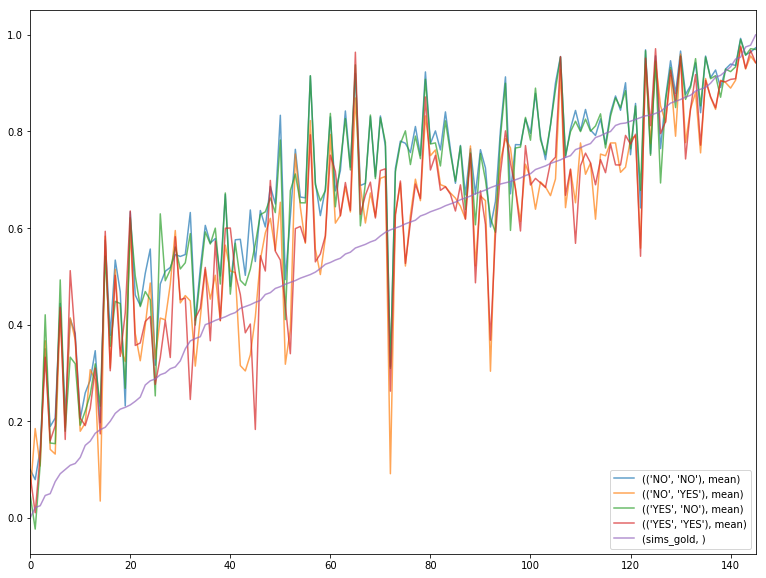

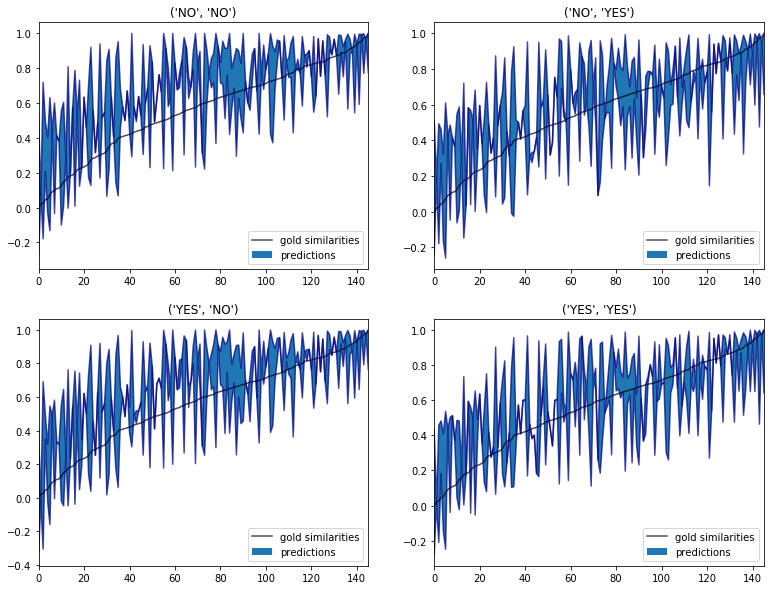

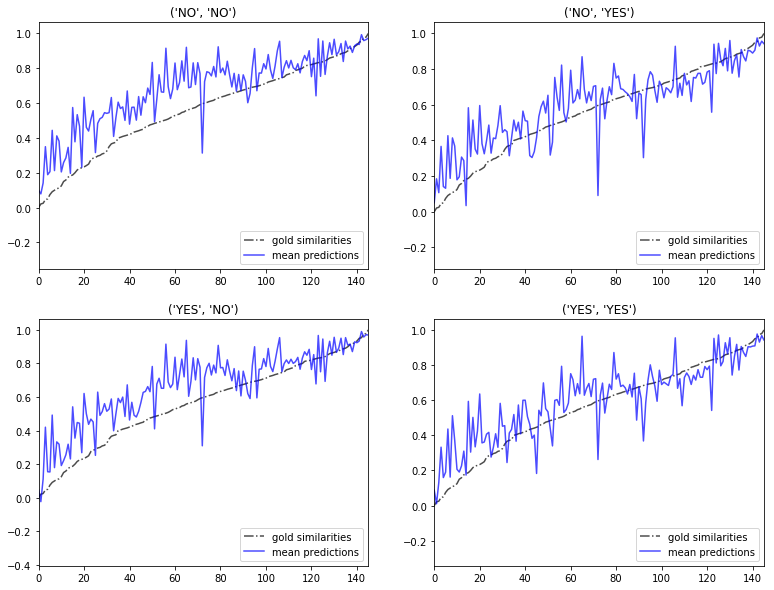

In [26]:

figsize = (13, 10)
images_2 = {}
#ax = plt.figure(figsize=figsize)
#plot = sims_predicted_grouped[['sims_gold', ("('NO', 'NO')", 'max_dif')]].plot(use_index=False, alpha=0.7, figsize=figsize)
## all
idx = pd.IndexSlice
means_and_gold = sims_predicted_grouped.sort_index().sort_index(axis=1).loc[:, idx[settings+['sims_gold'],['mean', '']]]
#means_and_gold = sims_predicted_grouped.sort_index().sort_index(axis=1).loc[:, idx[["('YES', 'NO')", "('YES', 'YES')", 'sims_gold'],['mean', '']]]

plot = means_and_gold.plot(use_index=False, alpha=0.7, figsize=figsize)
ax = plt.gca()
ax.legend(loc="lower right")
#fig_predictions_sep = plot.get_figure()
#images_2['fig_predictions_mean_all'] = plot.get_figure()
print_images({'fig_predictions_mean_togeth': plot.get_figure()})

fig_predictions_area_sep, axs = plt.subplots(2,2, figsize=figsize)
#sims_predicted.sort_values(by=["sims_gold"], ascending=True)[["sims_gold", "('NO', 'NO')"]].groupby("sims_gold").plot(use_index=False, alpha=0.7, figsize=figsize, ax=axs[0][0])
for i, s in enumerate(settings):
    x = i / 2
    y = i % 2
    
    ax = sims_predicted_grouped[["sims_gold", s]].plot(use_index=False, alpha=0.7, figsize=figsize, ax=axs[x][y])
    ax.fill_between(ax.lines[0].get_xdata(), ax.lines[1].get_ydata(), ax.lines[2].get_ydata(), label='predictions')
    # configure gold_sims ...
    ax.lines[0].set_color("black")
    ax.lines[0].set_label('gold similarities')
    # ... and min ...
    ax.lines[1].set_label('')
    ax.lines[1].set_color("navy")
    # ... and max ...
    ax.lines[2].set_color("navy")
    ax.lines[2].set_label('')
    # ... and mean ...
    ax.lines[3].set_linestyle('None')
    ax.lines[3].set_label('')
    ax.set_title(s)
    #ax.fill_between(ax.lines[0].get_xdata(), ax.lines[0].get_ydata(), ax.lines[1].get_ydata())
    axs[x][y].legend(loc="lower right")
    
print_images({'fig_predictions_area_sep':fig_predictions_area_sep})

fig_predictions_mean_sep, axs = plt.subplots(2,2, figsize=figsize)
#sims_predicted.sort_values(by=["sims_gold"], ascending=True)[["sims_gold", "('NO', 'NO')"]].groupby("sims_gold").plot(use_index=False, alpha=0.7, figsize=figsize, ax=axs[0][0])
for i, s in enumerate(settings):
    x = i / 2
    y = i % 2
    
    ax = sims_predicted_grouped[["sims_gold", s]].plot(use_index=False, alpha=0.7, figsize=figsize, ax=axs[x][y])
    #ax.fill_between(ax.lines[0].get_xdata(), ax.lines[1].get_ydata(), ax.lines[2].get_ydata(), label='predictions')
    # configure gold_sims ...
    ax.lines[0].set_linestyle('-.')
    ax.lines[0].set_color("black")
    ax.lines[0].set_label('gold similarities')
    # ... and min ...
    ax.lines[1].set_linestyle('None')
    ax.lines[1].set_label('')
    #ax.lines[1].set_color("navy")
    # ... and max ...
    ax.lines[2].set_linestyle('None')
    ax.lines[2].set_label('')
    #ax.lines[2].set_color("navy")
    # ... and mean ...
    #ax.lines[3].set_linestyle('None')
    ax.lines[3].set_color("blue")
    ax.lines[3].set_label('mean predictions')
    ax.set_title(s)
    #ax.fill_between(ax.lines[0].get_xdata(), ax.lines[0].get_ydata(), ax.lines[1].get_ydata())
    axs[x][y].legend(loc="lower right")

print_images({'fig_predictions_mean_sep':fig_predictions_mean_sep})

In [27]:
largest_pairs_grouped_neg = {}
largest_pairs_grouped_pos = {}
for s in settings:
    l = list(sims_errors_grouped.sort_values(by="error mean "+s, ascending=True)['indices'][:10])
    largest_pairs_grouped_neg[s]=sorted([item for sublist in l for item in sublist])
    l = list(sims_errors_grouped.sort_values(by="error mean "+s, ascending=False)['indices'][:10])
    largest_pairs_grouped_pos[s]=sorted([item for sublist in l for item in sublist])
#pd.DataFrame(largest_pairs_grouped_neg)
pd.DataFrame(largest_pairs_grouped_pos)

,"('NO', 'NO')","('NO', 'YES')","('YES', 'NO')","('YES', 'YES')"
0,868,868,598,868
1,933,933,868,933
2,971,971,971,971
3,1343,1343,2010,1343
4,2010,1893,2679,1893
5,2679,2010,2688,2010
6,2688,2679,3169,2090
7,3186,2688,3186,2679
8,3930,3930,3930,2688
9,4538,4538,4538,4538


In [28]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

errors_top100 = {}
errors_top10 = {}
errors = pd.DataFrame(errors_)
errors_abs = pd.DataFrame()
errors['sentence_A'] = sick_test['sentence_A']
errors['sentence_B'] = sick_test['sentence_B']
errors['score_gold'] = sick_test['relatedness_score'].sub(1.).div(4.)
#errors_dif = {}
for i, s1 in enumerate(settings):
    #all_sorted = errors.sort_values(by=[s1], ascending=False)
    #errors_top100[s1] = all_sorted[:100]
    #errors_top10[s1] = all_sorted[:10]
    errors['%s abs' % s1] = errors[s1].abs()
    for s2 in settings[i+1:]:
        errors['%s abs' % s2] = errors[s2].abs()
        #errors_dif[s1,s2] = errors[s2]-errors[s1]
        errors['%s vs %s' % (str(s1),str(s2))] = errors[s2]-errors[s1]
        errors['%s vs %s abs' % (str(s1),str(s2))] = (errors[s2]-errors[s1]).abs()
        errors['%s abs vs %s abs' % (str(s1),str(s2))] = errors['%s abs' % s2]-errors['%s abs' % s1]
        errors['%s abs vs %s abs abs' % (str(s1),str(s2))] = (errors['%s abs' % s2]-errors['%s abs' % s1]).abs()

# absolute error values
#errors_abs = pd.concat([errors.select_dtypes(exclude=['number']), errors.select_dtypes(include=['number']).apply(np.abs)], axis=1)
#errors_abs = errors
#for column in errors.select_dtypes(include=['number']):
#    errors_abs['%s abs' % column] = errors[column].apply(np.abs)
#errors_abs

#errors_top100[('NO', 'YES')]['score_gold'].mean()
#errors_top10[('NO', 'YES')]#[('NO', 'YES'), 'sentence_A', 'sentence_B', 'score_gold']
#errors_dif.keys() # (('NO', 'YES'), ('YES', 'YES')) #('NO', 'NO') vs ('NO', 'YES')
#errors_dif[(('NO', 'YES'), ('YES', 'YES'))]

def top_n_stats(s1, s2, n=10):
    result = pd.DataFrame()
    # compare performance
    # which is better?
    temp = errors.sort_values(by=["%s abs vs %s abs" % (s1, s2)], ascending=True)[:n]
    temp['type'] = "%s better" % s2
    result = result.append(temp)
    temp = errors.sort_values(by=["%s abs vs %s abs" % (s1, s2)], ascending=False)[:n]
    temp['type'] = "%s better" % s1
    result = result.append(temp)
    # similar or not?
    temp = errors.sort_values(by=["%s abs vs %s abs abs" % (s1, s2)], ascending=True)[:n]
    temp['type'] = "error dif min"
    result = result.append(temp)
    temp = errors.sort_values(by=["%s abs vs %s abs abs" % (s1, s2)], ascending=False)[:n]
    temp['type'] = "error dif max"
    result = result.append(temp)
    # individual over/under rating
    temp = errors.sort_values(by=["%s" % s1], ascending=True)[:n]
    temp['type'] = "%s underates" % s1
    result = result.append(temp)
    temp = errors.sort_values(by=["%s" % s2], ascending=True)[:n]
    temp['type'] = "%s underates" % s2
    result = result.append(temp)
    temp = errors.sort_values(by=["%s" % s1], ascending=False)[:n]
    temp['type'] = "%s overrates" % s1
    result = result.append(temp)
    temp = errors.sort_values(by=["%s" % s2], ascending=False)[:n]
    temp['type'] = "%s overrates" % s2
    result = result.append(temp)
    
    # filter columns
    remove_cols = []
    for col in list(result):
        for rem_s in settings:
            if rem_s not in [s1, s2] and rem_s in col:
                remove_cols.append(col)
    col_names = set(result) - set(remove_cols)
    result = result[sorted(list(col_names))]
    
    # store index
    result = result.reset_index()
    # move column 'type' to front
    cols = list(result)
    cols.insert(0, cols.pop(cols.index('type')))
    result = result.reindex(columns= cols)
    return result
    

top_n_stats("('NO', 'NO')", "('NO', 'YES')")

# order aware rocks (dep edge off) 
#errors.sort_values(by=["('NO', 'NO') vs ('NO', 'YES')"], ascending=True)[:10]

# order aware fails (dep edge off) 
#errors.sort_values(by=["('NO', 'NO') vs ('NO', 'YES')"], ascending=False)[:10]

# order aware rocks (dep edge on) 
#errors.sort_values(by=["('YES', 'NO') vs ('YES', 'YES') abs"], ascending=True)[:10]

# order aware fails (dep edge on) 
#errors.sort_values(by=["('YES', 'NO') vs ('YES', 'YES') abs"], ascending=False)[:10]


# dep edge rocks (order aware off) 
#errors.sort_values(by=["('NO', 'NO') vs ('YES', 'NO')"], ascending=True)[:10]

# dep edge fails (order aware off) 
#errors.sort_values(by=["('NO', 'NO') vs ('YES', 'NO')"], ascending=False)[:10]

# dep edge rocks (order aware on) 
#errors.sort_values(by=["('NO', 'YES') vs ('YES', 'YES')"], ascending=True)[:10]

# dep edge fails (order aware on) 
#errors.sort_values(by=["('NO', 'YES') vs ('YES', 'YES')"], ascending=False)[:10]

# just 
#errors[settings].sort_values(by="('NO', 'NO')", ascending=True)[:10]


,type,index,"('NO', 'NO')","('NO', 'NO') abs","('NO', 'NO') abs vs ('NO', 'YES') abs","('NO', 'NO') abs vs ('NO', 'YES') abs abs","('NO', 'NO') vs ('NO', 'YES')","('NO', 'NO') vs ('NO', 'YES') abs","('NO', 'YES')","('NO', 'YES') abs",score_gold,sentence_A,sentence_B
0,"('NO', 'YES') better",891,0.518776,0.518776,-0.496823,0.496823,-0.496823,0.496823,0.021954,0.021954,0.32500,One woman is playing a flute,A flute is being put away by a girl
1,"('NO', 'YES') better",902,0.416288,0.416288,-0.415090,0.415090,-0.417486,0.417486,-0.001198,0.001198,0.45000,A prey is quickly running behind the cheetah,A cheetah is chasing its prey across a field
2,"('NO', 'YES') better",4725,0.430232,0.430232,-0.409489,0.409489,-0.409489,0.409489,0.020743,0.020743,0.12500,The boy in the blue coverall is painting,The lady is holding the paintbrush next to the artist's easel
3,"('NO', 'YES') better",4649,0.404216,0.404216,-0.395195,0.395195,-0.395195,0.395195,0.009020,0.009020,0.55000,A dog is in a sandy area with the sand that is being stirred up into the air and several plants are in the background,A cat is in a sandy area with the sand that is being stirred up into the air and several plants are in the background
4,"('NO', 'YES') better",681,0.387575,0.387575,-0.380663,0.380663,-0.394487,0.394487,-0.006912,0.006912,0.50000,The lady isn't measuring the ankle of another woman,The lady is measuring the ankle of another woman
5,"('NO', 'YES') better",2957,0.468951,0.468951,-0.375551,0.375551,-0.375551,0.375551,0.093400,0.093400,0.45000,A person is cementing a jacket in a blue tall wall and jumping,A person in a blue jacket is jumping off of a tall cement wall
6,"('NO', 'YES') better",4268,0.405078,0.405078,-0.370741,0.370741,-0.370741,0.370741,0.034338,0.034338,0.45000,A white bird with a yellow beak is standing in the green grass,A black and orange bird is standing in the grass
7,"('NO', 'YES') better",2555,0.694075,0.694075,-0.357263,0.357263,-0.357263,0.357263,0.336812,0.336812,0.02500,A cat is looking at a store counter,A dog is looking around
8,"('NO', 'YES') better",684,0.365177,0.365177,-0.349383,0.349383,-0.380971,0.380971,-0.015794,0.015794,0.47500,The woman is measuring the other woman,The lady isn't measuring the ankle of another woman
9,"('NO', 'YES') better",4908,0.348780,0.348780,-0.348119,0.348119,-0.348119,0.348119,0.000662,0.000662,0.00000,A dog with golden fur is in the water,A woman is talking on a telephonic device


In [29]:
# sorted indices by error
error_indices_sorted = pd.DataFrame()
for s in settings:
    error_indices_sorted[s]=errors[settings].abs().sort_values(by=s, ascending=False).index
error_indices_sorted

,"('NO', 'NO')","('NO', 'YES')","('YES', 'NO')","('YES', 'YES')"
0,2555,2037,2555,928
1,3272,2405,3272,2380
2,1228,928,928,4146
3,928,2380,1228,2037
4,2380,934,2380,3467
5,2225,3467,3467,2222
6,2394,4146,4146,2341
7,3467,2931,2394,882
8,857,4898,2225,223
9,351,2389,351,2394


In [30]:
#error_indices_sorted.sort_values("('NO', 'NO')").index - error_indices_sorted.sort_values("('NO', 'YES')").index

In [31]:
# check overlop of indices between settings if taking the n smallest (or largest errors)
overlaps = []
#max_n = len(errors)
max_n = 200
for trunc_size in range(1, max_n):
    overlaps.append({})
    for i, s1 in enumerate(settings):
        s1_indices_set = set(error_indices_sorted[s1][:trunc_size].tolist())
        for s2 in settings[i+1:]:
            s2_indices_set = set(error_indices_sorted[s2][:trunc_size].tolist())
            union = s1_indices_set | s2_indices_set
            intersec = s1_indices_set & s2_indices_set
            ## revert (take last / smallest errors)
            #se = set(error_indices_sorted[s1][::-1][:trunc_size].tolist())
            #se.update(error_indices_sorted[s2][::-1][:trunc_size].tolist())
            #overlaps[-1]['%s vs %s' % (s1, s2)] = (2*trunc_size - len(se)) / float(trunc_size)
            overlaps[-1]['%s vs %s' % (s1, s2)] = len(intersec) / float(len(union))
            #print('%s vs %s' % (s1, s2, 2*trunc_size - len(se)))#, se)

pd.DataFrame(overlaps)#.plot(figsize=(15,10))

,"('NO', 'NO') vs ('NO', 'YES')","('NO', 'NO') vs ('YES', 'NO')","('NO', 'NO') vs ('YES', 'YES')","('NO', 'YES') vs ('YES', 'NO')","('NO', 'YES') vs ('YES', 'YES')","('YES', 'NO') vs ('YES', 'YES')"
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.500000,0.000000,0.200000,0.200000,0.200000
3,0.142857,1.000000,0.142857,0.142857,0.600000,0.142857
4,0.250000,1.000000,0.250000,0.250000,0.428571,0.250000
5,0.200000,0.714286,0.200000,0.333333,0.500000,0.333333
6,0.166667,0.555556,0.166667,0.400000,0.555556,0.400000
7,0.230769,0.777778,0.230769,0.333333,0.454545,0.333333
8,0.200000,0.800000,0.200000,0.285714,0.384615,0.285714
9,0.176471,0.818182,0.250000,0.250000,0.333333,0.333333


In [32]:
error_indices_ranked_dif = pd.DataFrame()
#error_indices_ranked_dif = {}
for i, s1 in enumerate(settings):
    #error_indices_ranked[s1]=sorted(errors[settings].abs().sort_values(by=s1, ascending=True).index.tolist())
    for s2 in settings[i+1:]:
        #error_indices_ranked[s2]=sorted(errors[settings].abs().sort_values(by=s2, ascending=True).index.tolist())
        #se = set(error_indices_neg[s1])
        #se.update(error_indices_neg[s2])
        error_indices_ranked_dif['%s vs %s' % (s1, s2)] = error_indices_sorted.sort_values(s1).index - error_indices_sorted.sort_values(s2).index
        #print('%s vs %s' % (s1, s2, 2*trunc_size - len(se)))#, se)

#error_indices_ranked_dif.hist(figsize=(15,10), alpha=.5, bins=100)
#error_indices_ranked_dif.plot.hist(figsize=(15,10), alpha=.5, bins=200)
#error_indices_ranked_dif#.plot(figsize=(15,10), alpha=.5)
error_indices_ranked_dif

#fig, ax = plt.subplots(1,1,figsize=(15,10))
#for column in error_indices_ranked_dif:
#    error_indices_ranked_dif[column].sort_values(ascending=False).plot(use_index=False, alpha=.5, figsize=(15,10))
#    #break



,"('NO', 'NO') vs ('NO', 'YES')","('NO', 'NO') vs ('YES', 'NO')","('NO', 'NO') vs ('YES', 'YES')","('NO', 'YES') vs ('YES', 'NO')","('NO', 'YES') vs ('YES', 'YES')","('YES', 'NO') vs ('YES', 'YES')"
0,-74,199,-147,273,-73,-346
1,533,166,-504,-367,-1037,-670
2,-1235,-1100,-393,135,842,707
3,-104,-168,-171,-64,-67,-3
4,-561,114,47,675,608,-67
5,-1454,-919,277,535,1731,1196
6,1741,-636,-332,-2377,-2073,304
7,-804,-411,-1048,393,-244,-637
8,-384,93,141,477,525,48
9,52,-34,187,-86,135,221


In [34]:
#for s in settings:
#    print('%-14s %.4f   %.4f' % (str(s), errors_top10[s]['score_gold'].mean(), errors_top100[s]['score_gold'].std()))
    #print(errors_top100[s]['score_gold'].std())

In [36]:
# biggest deviations (negative)
#errors.iloc[[2389, 2539, 732, 1569]]